<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/04_pytorch_dados_proprios_exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [8]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [9]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.4.1+cu121


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [10]:
# 1. Get data
import requests
import zipfile
from pathlib import Path
#COnfigurando o caminho para a pasta "data"
data_path = Path("data/")
image_path = data_path / "pizza_stake_sushi"

#Se a pasta das imagens nao existe, iremos criar e baixar os dados d github
if image_path.is_dir():
  print(f"{image_path} Diretorio existente, pulando download...")
else:
  print(f"{image_path} nao existe, criando...")
  image_path.mkdir(parents=True, exist_ok=True)

#Baixzando os dados pizza, steak, sushi
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/HammadN98/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Baixando os dados...")
  f.write(request.content)

#Descompactando os dados
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Descompactando")
  zip_ref.extractall(image_path)

data/pizza_stake_sushi Diretorio existente, pulando download...
Baixando os dados...
Descompactando


In [11]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_stake_sushi'.
There are 3 directories and 0 images in 'data/pizza_stake_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_stake_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_stake_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_stake_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_stake_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_stake_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_stake_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_stake_sushi/test/sushi'.


In [12]:
# Setup train and testing paths
#Configurando os caminhos de treino e teste
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_stake_sushi/train'),
 PosixPath('data/pizza_stake_sushi/test'))

Caminho da Imagem aleatoria: data/pizza_stake_sushi/train/steak/1647351.jpg
Classe da Imagem: steak
Altura da Imagem: 512
Largura da Imagem: 512


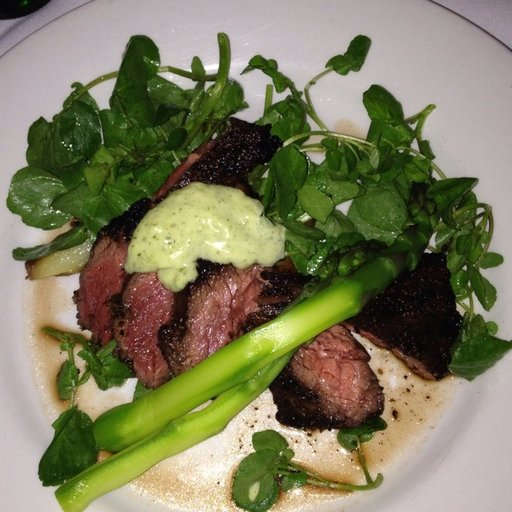

In [13]:
# Visualize an image
import random
from PIL import Image

#Seed
random.seed(42)

# 1. COnseguindo todos os caminhso das imagens
image_path_list = list(image_path.glob("*/*/*.jpg"))
#image_path_list

# 2. Escolhendo uma imagem aleatoria
random_image_path = random.choice(image_path_list)
#print(random_image_path)

# 3. Nome da classe apartir do paht name(A classe da imagem corresponde a pasta que a imagem se encontra)
image_class = random_image_path.parent.stem
#print(f"\n {image_class}")

# 4. Abrindo a imagem
img = Image.open(random_image_path)

# 5. Printando os metadados
print(f"Caminho da Imagem aleatoria: {random_image_path}")
print(f"Classe da Imagem: {image_class}")
print(f"Altura da Imagem: {img.height}")
print(f"Largura da Imagem: {img.width}")
img

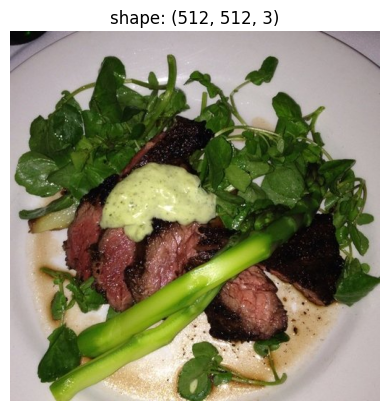

In [14]:
# Do the image visualization with matplotlib
import matplotlib.pyplot as plt

#PAra carregar
ims_plt = plt.imread(random_image_path)

#Para exibir
plt.imshow(ims_plt)

#Removendo eixo
plt.axis("off")

plt.title(f"shape: {ims_plt.shape}")
# Mostrar a imagem
plt.show()

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [15]:
# 3.1 Transforming data with torchvision.transforms
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
#Transformando uma imagem
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    #DEixando a imagem horizontal de maneira random
    transforms.RandomHorizontalFlip(p=0.5),
    #Transformando img em tensor
    transforms.ToTensor()
    ])

In [16]:
# Write transform for turning images into tensors


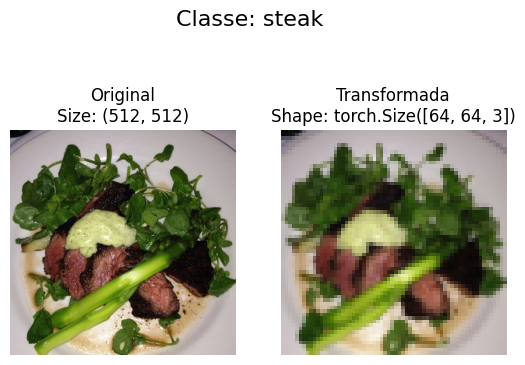

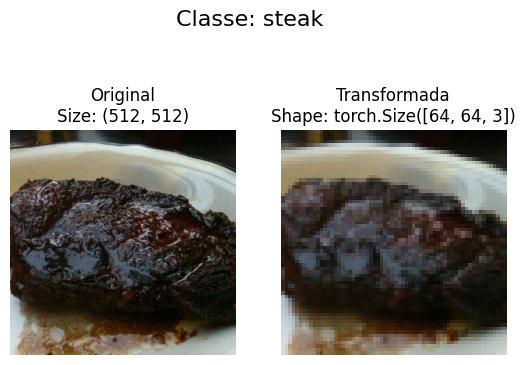

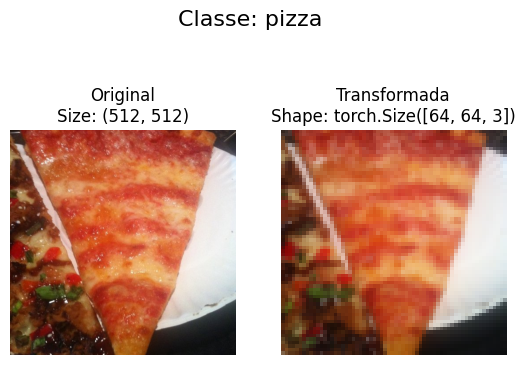

In [17]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Seleciona imagens aleatorias do cominho de imagens e carrega/transforma
  para entao plotar a original e a versao transformada
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      #Transformando e plotando a imagem
      transformed_image = transform(f).permute(1, 2, 0) #Permute para colocar os canais de cores por ultimo
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformada\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Classe: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

### Load image data using `ImageFolder`

In [18]:
# Use ImageFolder to create dataset(s)
#Usando o ImageFolder para criar os datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #Trasformado para os dados
                                  target_transform=None) #Trasformador para os labels/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [19]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [22]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_stake_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_stake_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [23]:
# Turn train and test Datasets into DataLoaders


In [24]:
import os
os.cpu_count()

2

In [25]:
# How many batches of images are in our data loaders?
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cf4e6396350>,
 <torch.utils.data.dataloader.DataLoader at 0x7cf4e5ecf1c0>)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [26]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Por default o valor do stride eh igual ao kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Por default o valor do stride eh igual ao kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    #return self.classifier(self.conv_block_2(self.conv_block_1(x))) #Beneficia LEr how to make your GPU go brrrrrrrrrr from firts principles
    return x

In [27]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, #Numero de canais de cores
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

In [28]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [29]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X,y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [30]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [31]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

modelo_5 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_5.parameters(),
                             lr=0.001)

resultados_5 = train(model=modelo_5,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     epochs=5)
#resultados_5

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1064 | train_acc: 0.3125 | test_loss: 1.0989 | test_acc: 0.2812
Epoch: 2 | train_loss: 1.1003 | train_acc: 0.3320 | test_loss: 1.0696 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0881 | train_acc: 0.3633 | test_loss: 1.0829 | test_acc: 0.4413
Epoch: 4 | train_loss: 1.0873 | train_acc: 0.3867 | test_loss: 1.0597 | test_acc: 0.6042
Epoch: 5 | train_loss: 1.0667 | train_acc: 0.4062 | test_loss: 1.0691 | test_acc: 0.5341


In [32]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modelo_20 = TinyVGG(input_shape=3,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_20.parameters(),
                             lr=0.001)
resultados_20 = train(model=modelo_20,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1064 | train_acc: 0.3125 | test_loss: 1.0989 | test_acc: 0.2812
Epoch: 2 | train_loss: 1.1003 | train_acc: 0.3320 | test_loss: 1.0696 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0881 | train_acc: 0.3633 | test_loss: 1.0829 | test_acc: 0.4413
Epoch: 4 | train_loss: 1.0873 | train_acc: 0.3867 | test_loss: 1.0597 | test_acc: 0.6042
Epoch: 5 | train_loss: 1.0667 | train_acc: 0.4062 | test_loss: 1.0691 | test_acc: 0.5341
Epoch: 6 | train_loss: 1.0332 | train_acc: 0.4531 | test_loss: 1.0166 | test_acc: 0.5028
Epoch: 7 | train_loss: 0.9847 | train_acc: 0.4336 | test_loss: 0.9354 | test_acc: 0.5938
Epoch: 8 | train_loss: 0.9490 | train_acc: 0.5742 | test_loss: 1.0353 | test_acc: 0.4242
Epoch: 9 | train_loss: 0.9247 | train_acc: 0.5938 | test_loss: 1.0896 | test_acc: 0.3532
Epoch: 10 | train_loss: 1.0117 | train_acc: 0.4492 | test_loss: 1.0373 | test_acc: 0.4138
Epoch: 11 | train_loss: 0.8790 | train_acc: 0.5273 | test_loss: 0.9781 | test_acc: 0.5634
Epoch: 12 | train_l

In [33]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modelo_50 = TinyVGG(input_shape=3,
                    hidden_units=10,
                    output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_50.parameters(),
                             lr=0.001)

resultados_50 = train(model=modelo_50,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1064 | train_acc: 0.3125 | test_loss: 1.0989 | test_acc: 0.2812
Epoch: 2 | train_loss: 1.1003 | train_acc: 0.3320 | test_loss: 1.0696 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0881 | train_acc: 0.3633 | test_loss: 1.0829 | test_acc: 0.4413
Epoch: 4 | train_loss: 1.0873 | train_acc: 0.3867 | test_loss: 1.0597 | test_acc: 0.6042
Epoch: 5 | train_loss: 1.0667 | train_acc: 0.4062 | test_loss: 1.0691 | test_acc: 0.5341
Epoch: 6 | train_loss: 1.0332 | train_acc: 0.4531 | test_loss: 1.0166 | test_acc: 0.5028
Epoch: 7 | train_loss: 0.9847 | train_acc: 0.4336 | test_loss: 0.9354 | test_acc: 0.5938
Epoch: 8 | train_loss: 0.9490 | train_acc: 0.5742 | test_loss: 1.0353 | test_acc: 0.4242
Epoch: 9 | train_loss: 0.9247 | train_acc: 0.5938 | test_loss: 1.0896 | test_acc: 0.3532
Epoch: 10 | train_loss: 1.0117 | train_acc: 0.4492 | test_loss: 1.0373 | test_acc: 0.4138
Epoch: 11 | train_loss: 0.8790 | train_acc: 0.5273 | test_loss: 0.9781 | test_acc: 0.5634
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [34]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

modelo_6 = TinyVGG(input_shape=3,
                   hidden_units=20,
                   output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_6.parameters(),
                             lr=0.001)

resultados_6 = train(model=modelo_6,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1040 | train_acc: 0.2695 | test_loss: 1.1015 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.1003 | train_acc: 0.3047 | test_loss: 1.0997 | test_acc: 0.2708
Epoch: 3 | train_loss: 1.0951 | train_acc: 0.4531 | test_loss: 1.0871 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1155 | train_acc: 0.3047 | test_loss: 1.0995 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0795 | train_acc: 0.4531 | test_loss: 1.1280 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0640 | train_acc: 0.4141 | test_loss: 1.1569 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.0803 | train_acc: 0.2969 | test_loss: 1.1437 | test_acc: 0.3021
Epoch: 8 | train_loss: 1.0289 | train_acc: 0.5664 | test_loss: 1.0836 | test_acc: 0.3428
Epoch: 9 | train_loss: 0.9646 | train_acc: 0.5742 | test_loss: 1.1002 | test_acc: 0.3532
Epoch: 10 | train_loss: 1.0445 | train_acc: 0.4688 | test_loss: 0.9693 | test_acc: 0.5540
Epoch: 11 | train_loss: 0.9304 | train_acc: 0.5469 | test_loss: 0.9265 | test_acc: 0.5530
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [35]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [36]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.


Excellent, we now have double the training and testing images...

In [37]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [38]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_dir = torchvision.datasets.ImageFolder(root='data/pizza_steak_sushi_20_percent/train',
                                              transform=simple_transform)
test_dir = ImageFolder(root=test_data_20_percent_path, transform=simple_transform)

# Create dataloaders
train_dataloader = DataLoader(train_dir, batch_size=32, num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(test_dir, batch_size=32, num_workers=os.cpu_count(), shuffle=False)

In [39]:
train_dir, train_dataloader, test_dataloader

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi_20_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 <torch.utils.data.dataloader.DataLoader at 0x7cf4e452a050>)

In [51]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

modelo_7_10 = TinyVGG(input_shape=3,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_7_10.parameters(), lr=0.001)

resultados_7_10 = train(model=modelo_7_10,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1047 | train_acc: 0.3146 | test_loss: 1.0972 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0887 | train_acc: 0.4021 | test_loss: 1.0741 | test_acc: 0.4290
Epoch: 3 | train_loss: 1.0555 | train_acc: 0.4938 | test_loss: 1.0409 | test_acc: 0.4665
Epoch: 4 | train_loss: 0.9822 | train_acc: 0.5292 | test_loss: 0.9782 | test_acc: 0.5392
Epoch: 5 | train_loss: 0.9814 | train_acc: 0.4813 | test_loss: 0.9326 | test_acc: 0.5756
Epoch: 6 | train_loss: 0.8729 | train_acc: 0.6083 | test_loss: 0.9444 | test_acc: 0.5483
Epoch: 7 | train_loss: 0.9369 | train_acc: 0.6083 | test_loss: 0.9420 | test_acc: 0.5858
Epoch: 8 | train_loss: 0.8891 | train_acc: 0.5979 | test_loss: 0.9305 | test_acc: 0.5693
Epoch: 9 | train_loss: 0.8768 | train_acc: 0.5792 | test_loss: 0.9287 | test_acc: 0.5824
Epoch: 10 | train_loss: 0.8856 | train_acc: 0.6021 | test_loss: 0.9267 | test_acc: 0.5818
Epoch: 11 | train_loss: 0.8770 | train_acc: 0.6083 | test_loss: 0.9232 | test_acc: 0.5977
Epoch: 12 | train_l

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

modelo_7_20 = TinyVGG(input_shape=3,
                   hidden_units=20,
                   output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_7_20.parameters(), lr=0.001)

resultados_7_20 = train(model=modelo_7_20,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1013 | train_acc: 0.3479 | test_loss: 1.0956 | test_acc: 0.4199
Epoch: 2 | train_loss: 1.0973 | train_acc: 0.3563 | test_loss: 1.0594 | test_acc: 0.4267
Epoch: 3 | train_loss: 1.0369 | train_acc: 0.5167 | test_loss: 0.9838 | test_acc: 0.5210
Epoch: 4 | train_loss: 0.9382 | train_acc: 0.5813 | test_loss: 0.9686 | test_acc: 0.4926
Epoch: 5 | train_loss: 0.8960 | train_acc: 0.5750 | test_loss: 0.9387 | test_acc: 0.5472
Epoch: 6 | train_loss: 0.8732 | train_acc: 0.6021 | test_loss: 0.9357 | test_acc: 0.5733
Epoch: 7 | train_loss: 0.8624 | train_acc: 0.6292 | test_loss: 0.9432 | test_acc: 0.5750
Epoch: 8 | train_loss: 0.8940 | train_acc: 0.6000 | test_loss: 1.0023 | test_acc: 0.5449
Epoch: 9 | train_loss: 0.8625 | train_acc: 0.5958 | test_loss: 0.9152 | test_acc: 0.5767
Epoch: 10 | train_loss: 0.7684 | train_acc: 0.6792 | test_loss: 1.0064 | test_acc: 0.5114
Epoch: 11 | train_loss: 0.8033 | train_acc: 0.6646 | test_loss: 0.9166 | test_acc: 0.5472
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [53]:
url2 = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"

In [65]:
url3 = "https://raw.githubusercontent.com/HammadN98/pytorch/refs/heads/main/dados/PIZZA_LONGE.jfif"

In [75]:
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get(url3)
  f.write(request.content)


# Load the image
import torchvision

img = torchvision.io.read_image(custom_image)
img.shape

torch.Size([3, 183, 276])

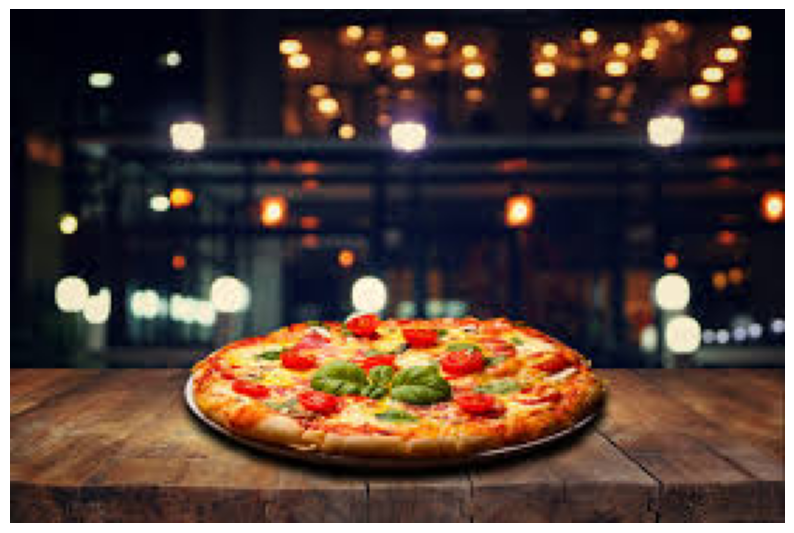

In [76]:
import matplotlib.pyplot as plt

# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

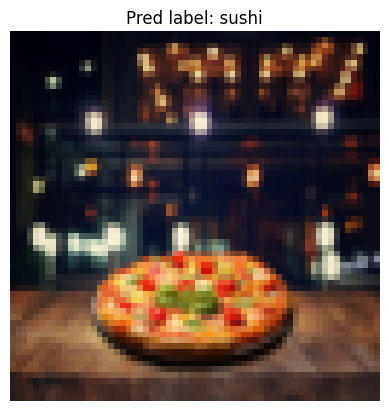

In [77]:
# Make a prediction on the image
modelo_7_20.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = modelo_7_20(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);

Errou tres testes, ou seja ta uma B****, mas era o esperando.
Um modelo pequeno treinado com poucos dados, que deu overfit. Tem muito que fazer nao. Tentar melhorar esse modelo seria trabalhoso demais para o que ele poderia vir a oferecer(Tecnicas de dataAugmentation, etc...). Vale mais a pena pegar um modelo um pocuo mais e treinar por menos tempo, para nao dar overfit. Creio que deva performar muito melhor.

ERROS:
1. Usando a foto do pizza_dad e modelo_7_20 preveu -> steak
2. Usando a foto do PIZZA_LONGE e modelo_7_10 preveu -> steak
3. Usando a foto do PIZZA_LONGE e modelo_7_20 preveu -> sushi

